## Hitters data example in python keras  



In [1]:
##################################################
### imports

##basic
import numpy as np
import pandas as pd
import math

In [2]:
## graphics
import matplotlib.pyplot as plt

In [3]:
## sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

In [5]:
## keras, will get from tensoflow
import tensorflow as tf
import random

In [6]:
## loss functions
def rmsef(y,yp):
   return(np.sqrt(np.mean((y-np.squeeze(yp))**2)))
def madf(y,yp):
   return(np.mean(np.abs(y-np.squeeze(yp))))

In [7]:
##################################################
### read in data

hdtr = pd.read_csv("https://bitbucket.org/remcc/rob-data-sets/downloads/Gitters_train.csv")
hdte = pd.read_csv("https://bitbucket.org/remcc/rob-data-sets/downloads/Gitters_test.csv")
print(hdtr.shape)
print(hdte.shape)
print(hdtr.columns) # names of variables
ntr = hdtr.shape[0] #sample size = number of rows
p = hdtr.shape[1]-1 #number of features = number of columns -1 , last column is y=salary

## get X and y as simple numpy arrays
hdtrnp = hdtr.to_numpy()
Xtr = hdtrnp[:,:p] #first p columns
ytr = hdtrnp[:,-1] #last column

hdtenp = hdte.to_numpy()
Xte = hdtenp[:,:p] #first p columns
yte = hdtenp[:,-1] #last column

## check it is already scaled, should scale using just train, but this is the way ISLR did it
X = np.vstack([Xtr,Xte])
print('feature means (should be 0):')
print(np.mean(X,axis=0))
print('feature sd (should be 1):')
print(np.std(X,axis=0))

(176, 21)
(87, 21)
Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'LeagueA', 'LeagueN',
       'DivisionW', 'PutOuts', 'Assists', 'Errors', 'NewLeagueN', 'y'],
      dtype='object')
feature means (should be 0):
[ 1.83207906e-16  2.70168341e-16 -4.05252511e-17 -1.84052182e-16
 -1.55346796e-16  2.02626255e-17  1.71388041e-16  9.11818150e-17
  6.24764288e-17 -2.56659924e-16  6.75420851e-17  1.41838379e-16
  4.39023553e-17  1.53320533e-15 -1.53320533e-15 -2.02626255e-15
  1.74765145e-16 -1.35084170e-16  8.76358555e-16  1.55009085e-15]
feature sd (should be 1):
[0.99809705 0.99809705 0.99809705 0.99809705 0.99809705 0.99809705
 0.99809705 0.99809705 0.99809705 0.99809705 0.99809705 0.99809705
 0.99809705 0.99809705 0.99809705 0.99809705 0.99809705 0.99809705
 0.99809705 0.99809705]


In [8]:
##################################################
## fit linear on train, predict on test

lmmod = LinearRegression()
lmmod.fit(Xtr,ytr)
ypredlin = lmmod.predict(Xte)
yhatlin = lmmod.predict(Xtr)

print(f'out of sample test rmse from linear model is {rmsef(yte,ypredlin):0.4f}')
print(f'out of sample test mad from linear model is {madf(yte,ypredlin):0.4f}')

## check
print(f'check: rmse from sklearn mse fun: {math.sqrt(mean_squared_error(yte,ypredlin)):0.4f}')

out of sample test rmse from linear model is 341.0237
out of sample test mad from linear model is 254.6687
check: rmse from sklearn mse fun: 341.0237


Text(0.5, 1.0, 'linear out of sample')

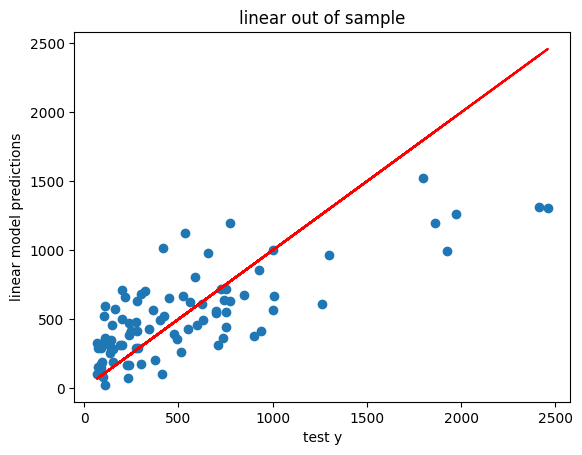

In [9]:
##plot out of sample prediction
plt.scatter(yte,ypredlin)
plt.plot(yte,yte,c='r')
plt.xlabel('test y'); plt.ylabel('linear model predictions')
plt.title('linear out of sample')

Text(0.5, 1.0, 'linear in sample')

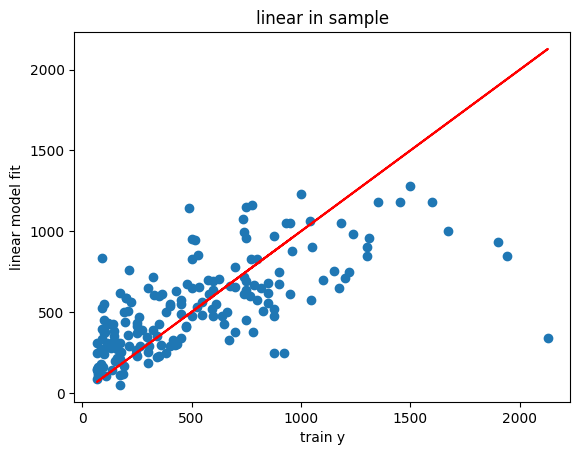

In [10]:
##plot in sample prediction
plt.scatter(ytr,yhatlin)
plt.plot(ytr,ytr,c='r')
plt.xlabel('train y'); plt.ylabel('linear model fit')
plt.title('linear in sample')

In [11]:
##################################################
## fit LASSO on train, predict on test

## LassoCV seems to have mse hard coded in,
##    unlike glmnet which allows us to choose cv loss with type.measure parameter.
lcv = LassoCV(cv=10)
lcv.fit(Xtr,ytr)

#best alpha and coefficients
print("best alpha: ",lcv.alpha_)

#coefficents
print("coeficients at best alpha: ",lcv.coef_)
print("number of 0 coefficents: ",np.sum(lcv.coef_ == 0))

best alpha:  25.238631113423445
coeficients at best alpha:  [  0.          16.34663779  30.45102074   2.16080661   0.
  81.06971356   0.           0.         153.25603511   0.
   0.           1.25121039   0.          -0.           0.
 -40.48935331  18.97158766   0.          -0.           0.        ]
number of 0 coefficents:  12


In [12]:
#predicted values
ypredL = lcv.predict(Xte)
yhatL = lcv.predict(Xtr)

print(f'out of sample test rmse from linear model is {rmsef(yte,ypredlin):0.4f}')
print(f'out of sample test mad from linear model is {madf(yte,ypredlin):0.4f}')
print(f'out of sample test rmse from LASSO is {rmsef(yte,ypredL):0.4f}')
print(f'out of sample test mad from LASSO is {madf(yte,ypredL):0.4f}')

out of sample test rmse from linear model is 341.0237
out of sample test mad from linear model is 254.6687
out of sample test rmse from LASSO is 370.4170
out of sample test mad from LASSO is 258.0145


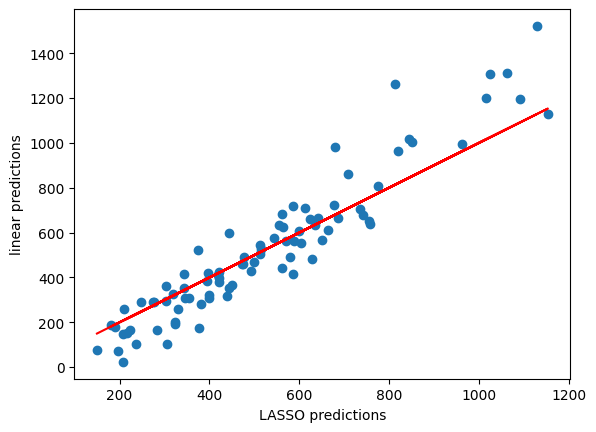

In [13]:
## compare LASSO to linear
plt.scatter(ypredL,ypredlin)
plt.xlabel('LASSO predictions'); plt.ylabel('linear predictions')
plt.plot(ypredL,ypredL,c='r')

In [14]:
##################################################
### single layer, 50 units, relu, dropout
seed=34
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed) ## ? just need this one ??

## make model
nunit =  50
nx = Xtr.shape[1] # number of x's
nn1 = tf.keras.models.Sequential()

## add one hidden layer and dropout, one linear output
nn1.add(tf.keras.layers.Dense(units=nunit,activation='relu',input_shape=(nx,)))
nn1.add(tf.keras.layers.Dropout(.4))
nn1.add(tf.keras.layers.Dense(units=1))

#compile model
nn1.compile(loss='mse',optimizer='rmsprop',metrics=['mean_absolute_error'])

# fit
nepoch = 1500
nhist = nn1.fit(Xtr,ytr,epochs=nepoch,verbose=1,batch_size=32,validation_data=(Xte,yte))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1500
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 450192.0625 - mean_absolute_error: 533.9444 - val_loss: 556074.3750 - val_mean_absolute_error: 540.0939
Epoch 2/1500
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 449592.6562 - mean_absolute_error: 533.5551 - val_loss: 555672.6250 - val_mean_absolute_error: 539.8549
Epoch 3/1500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 449180.0312 - mean_absolute_error: 533.2937 - val_loss: 555308.8750 - val_mean_absolute_error: 539.6407
Epoch 4/1500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 448898.9375 - mean_absolute_error: 533.0479 - val_loss: 554962.5000 - val_mean_absolute_error: 539.4351
Epoch 5/1500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 448802.9688 - mean_absolute_error: 533.0049 - val_loss: 554630.3750 - val_mean_absolute_error: 539.2487
Epoch 6/1500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 448327.2812 - mean_absolute_error: 532.7374 - val_loss: 554281.8750 - val_mean_absolute_error: 539.0479
Epoch 7/1500
6/6 ━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Text(0.5, 1.0, 'training, min validation rmse is 335.55')

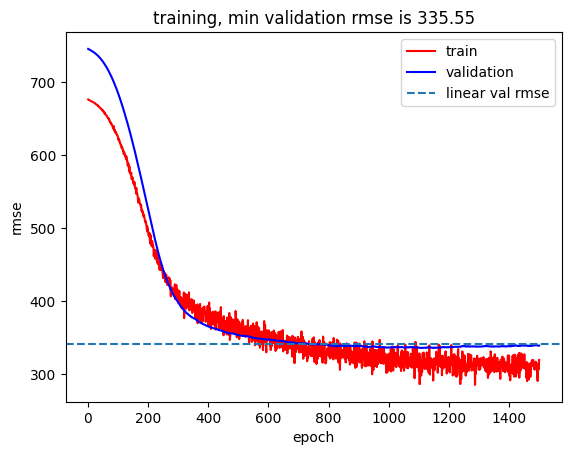

In [15]:
##################################################
### plot training by epoch
yhatnn = nn1.predict(Xtr)
yprednn = nn1.predict(Xte)

trL = np.sqrt(nhist.history['loss'])
teL = np.sqrt(nhist.history['val_loss'])
epind = range(1,len(trL)+1)
plt.plot(epind,trL,c='red',label='train')
plt.plot(epind,teL,c='blue',label='validation')
plt.xlabel('epoch'); plt.ylabel('rmse')
plt.axhline(rmsef(yte,ypredlin),linestyle='--',label='linear val rmse')
plt.legend()
minrmse = teL.min()
plt.title(f'training, min validation rmse is {minrmse:0.2f}')

Text(0, 0.5, 'nn fits')

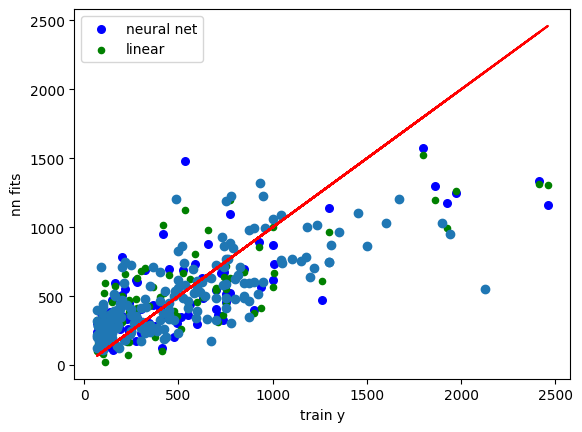

In [17]:
##################################################
### plot and rmse/mad

plt.scatter(yte,yprednn,c='blue',s=30,label='neural net')
plt.scatter(yte,ypredlin,c='green',s=20,label='linear')
plt.plot(yte,yte,c='r')
plt.xlabel('test y'); plt.ylabel('predictions')
plt.legend()

plt.scatter(ytr,yhatnn)
plt.plot(ytr,ytr,c='r')
plt.xlabel('train y'); plt.ylabel('nn fits')

Text(0, 0.5, 'linear fits')

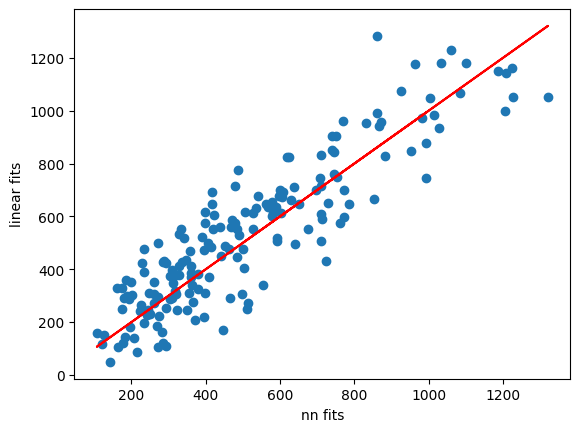

In [18]:
plt.scatter(yhatnn,yhatlin)
plt.plot(yhatnn,yhatnn,c='r')
plt.xlabel('nn fits'); plt.ylabel('linear fits')

In [19]:
print(f'out of sample test rmse from linear model is {rmsef(yte,ypredlin):0.4f}')
print(f'out of sample test rmse from LASSO is {rmsef(yte,ypredL):0.4f}')
print(f'out of sample test rmse from neural net is {rmsef(yte,yprednn):0.4f}')
print('\n\n')

print(f'out of sample test mad from linear model is {madf(yte,ypredlin):0.4f}')
print(f'out of sample test mad from LASSO is {madf(yte,ypredL):0.4f}')
print(f'out of sample test mad from neural net is {madf(yte,yprednn):0.4f}')

out of sample test rmse from linear model is 341.0237
out of sample test rmse from LASSO is 370.4170
out of sample test rmse from neural net is 338.8322



out of sample test mad from linear model is 254.6687
out of sample test mad from LASSO is 258.0145
out of sample test mad from neural net is 247.8864
